In [1]:
import warnings
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

In [66]:
Order=pd.read_csv('Orders.csv')

In [67]:
Order['Profit'], Order['Sales']

(0          $62.15
 1        -$288.77
 2         $919.97
 3         -$96.54
 4         $311.52
            ...   
 51285       $4.50
 51286       $3.34
 51287       $2.48
 51288       $2.40
 51289       $1.80
 Name: Profit, Length: 51290, dtype: object,
 0          $221.98
 1        $3,709.40
 2        $5,175.17
 3        $2,892.51
 4        $2,832.96
            ...    
 51285       $65.10
 51286       $16.72
 51287        $8.56
 51288       $13.44
 51289       $61.38
 Name: Sales, Length: 51290, dtype: object)

In [69]:
#Convert Profit and Sales columns to numeric type
idx = ['Profit','Sales']
for i in idx:
    Order[i]=pd.to_numeric(Order[i].str.replace('$','').str.replace(',',''),errors='ignore')

In [70]:
Order[['Profit','Sales']].dtypes

Profit    float64
Sales     float64
dtype: object

In [56]:
Order.isnull().sum() #there are 41296 null values in Postal.Code column. Other columns don't have null values.

Row.ID                0
Order.ID              0
Order.Date            0
Ship.Date             0
Ship.Mode             0
Customer.ID           0
Customer.Name         0
Segment               0
Postal.Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product.ID            0
Category              0
Sub.Category          0
Product.Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping.Cost         0
Order.Priority        0
dtype: int64

In [71]:
Order[['Order.Date','Ship.Date']].dtypes

Order.Date    object
Ship.Date     object
dtype: object

# Order Seasonality and Categorical Analysis

In [72]:
#Convert date columns to date types
Order['Order.Date']=pd.to_datetime(Order['Order.Date'],format='%m/%d/%y')
Order['Ship.Date']=pd.to_datetime(Order['Ship.Date'],format='%m/%d/%y')

In [73]:
Order[['Order.Date','Ship.Date']].dtypes

Order.Date    datetime64[ns]
Ship.Date     datetime64[ns]
dtype: object

In [79]:
#Get the month of the order date
Order['Order.Month']=Order['Order.Date'].dt.month

In [80]:
Order['Order.Month'].unique()

array([11,  2, 10,  1,  6,  4,  3, 12,  7,  9,  8,  5], dtype=int64)

In [86]:
#Get the year of the order date
Order['Order.Year']=Order['Order.Date'].dt.year
Order['Order.Year'].unique()

array([2014, 2012, 2013, 2015], dtype=int64)

In [91]:
#Create a table ready for Seasonality Analysis 
Season=Order.groupby(['Order.Year','Order.Month'])['Quantity'].sum().unstack('Order.Year')
Season

Order.Year,2012,2013,2014,2015
Order.Month,,,,
1,1463,1874,2413,3122
2,1401,1444,2102,2482
3,1745,2237,2686,3722
4,1934,2250,2688,3594
5,2167,2921,3808,4300
6,3002,3671,5327,6009
7,1836,2321,3252,3637
8,3020,3818,4934,5824
9,3644,4205,5793,6837


<AxesSubplot:title={'center':'Seaonality Analysis by Year(USD)'}, xlabel='Order.Month'>

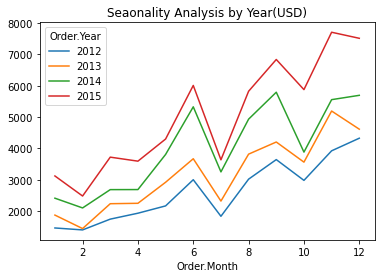

In [142]:
Season.plot(
    y=Season.columns,
    title='Seaonality Analysis by Year(USD)'
)

In [103]:
#Create a table ready for Seasonal categorical Analysis 
Season_Cat=Order.groupby(['Order.Month','Category'])['Quantity'].sum().unstack('Category')

In [114]:
Order.groupby(['Order.Month','Category'])['Quantity'].sum().unstack('Category')

Category,Furniture,Office Supplies,Technology
Order.Month,,,
1,1750,5480,1642
2,1494,4340,1595
3,2098,6283,2009
4,2005,6391,2070
5,2484,8170,2542
6,3434,11012,3563
7,2157,6618,2271
8,3059,11019,3518
9,4111,12572,3796


In [115]:
Order.groupby(['Order.Month','Category'])['Sales'].sum().unstack('Category')

Category,Furniture,Office Supplies,Technology
Order.Month,,,
1,228829.15,222428.77,225531.38
2,190255.60,157169.49,207225.12
3,250388.41,224884.15,285245.78
4,210529.31,226586.55,258863.00
5,285390.71,283526.00,346576.53
6,409439.17,369467.36,483174.76
7,227072.62,236415.51,288818.33
8,391224.77,404230.43,498860.35
9,493576.73,423979.50,514197.78


<AxesSubplot:title={'center':'Seasonality Analysis by Month for each Order Category(USD)'}, xlabel='Order.Month'>

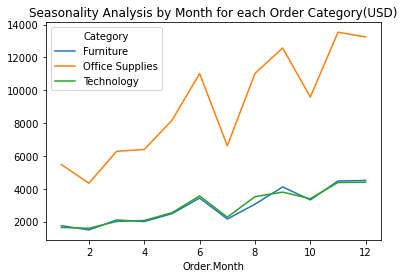

In [141]:
Season_Cat.plot(
    y=Season_Cat.columns,
    title='Seasonality Analysis by Month for each Order Category(USD)'
)

# Explore how much profit did we lose due to returns each year

In [105]:
#Load the returns file
Return=pd.read_csv('Returns.csv')

In [107]:
Return.shape, Order.shape

((1079, 3), (51290, 26))

In [108]:
Return.columns

Index(['Returned', 'Order ID', 'Region'], dtype='object')

In [111]:
Return['Returned'].value_counts()

Yes    1079
Name: Returned, dtype: int64

In [116]:
Order.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Order.Month',
       'Order.Year'],
      dtype='object')

In [117]:
#Change column name 'Order ID' to 'Order.ID' for merging
Return.rename(columns={'Order ID':'Order.ID'},inplace=True)
Return.columns

Index(['Returned', 'Order.ID', 'Region'], dtype='object')

In [118]:
Return.dtypes

Returned    object
Order.ID    object
Region      object
dtype: object

In [119]:
Order=Order.merge(Return,how='left',on='Order.ID')
Order.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Returned,Region_y
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.98,2,0.0,62.15,40.77,High,11,2014,NaN,NaN
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.40,9,0.1,-288.77,923.63,Critical,2,2014,NaN,NaN
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5175.17,9,0.1,919.97,915.49,Medium,10,2014,NaN,NaN
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2892.51,5,0.1,-96.54,910.16,Medium,1,2014,NaN,NaN
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2832.96,8,0.0,311.52,903.04,Critical,11,2014,NaN,NaN


In [120]:
Order['Returned'].unique()

array([nan, 'Yes'], dtype=object)

In [121]:
#Find the returned orders
Returned_Order=Order[Order['Returned']=='Yes']
Returned_Order.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Returned,Region_y
26,30191,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1715.16,2,0.0,720.36,725.57,Critical,12,2012,Yes,Eastern Asia
53,30190,IN-2012-PB19210127-41259,2012-12-16,2012-12-19,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2197.50,5,0.0,153.75,627.27,Critical,12,2012,Yes,Eastern Asia
75,25438,IN-2015-JH158207-42140,2015-05-16,2015-05-18,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,...,2863.35,5,0.1,858.90,581.88,Critical,5,2015,Yes,Oceania
110,32648,CA-2014-AS10045140-41727,2014-03-29,2014-04-01,First Class,AS-100451408,Aaron Smayling,Corporate,22204.0,Arlington,...,31.40,2,0.0,7.85,3.81,Medium,3,2014,Yes,Southern US
113,29629,IN-2014-LC168857-41747,2014-04-18,2014-04-19,First Class,LC-168857,Lena Creighton,Consumer,NaN,Sydney,...,1601.64,5,0.1,587.19,511.47,Critical,4,2014,Yes,Oceania


<AxesSubplot:title={'center':'Profit Loss by Year (USD)'}, xlabel='Order.Year'>

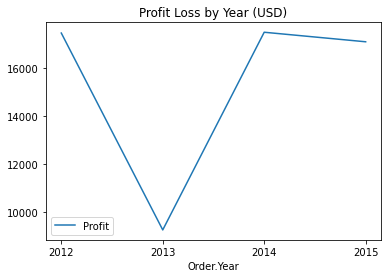

In [139]:
Returned_Order.groupby(['Order.Year'])[['Profit']].sum().plot(
    xticks=list(range(min(Returned_Order['Order.Year']),max(Returned_Order['Order.Year']+1))),
    title='Profit Loss by Year (USD)'
)

In [144]:
Returned_Order.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Order.Month',
       'Order.Year', 'Returned', 'Region_y'],
      dtype='object')

In [167]:
#How many customer returned more than once? more than 5 times?
print(f"Number of customers who returned more than once is {sum(Returned_Order.groupby('Customer.ID')['Returned'].count()>1)}")
print(f"Number of customers who returned more than 5 times is {sum(Returned_Order.groupby('Customer.ID')['Returned'].count()>5)}")

Number of customers who returned more than once is 547
Number of customers who returned more than 5 times is 46


In [185]:
#Which regions are more likely to return orders?

#number of orders by region:
Order_Region=Order.groupby('Region_x')['Order.ID'].nunique()

#number of returns by region:
Return_Region=Returned_Order.groupby('Region_x')['Order.ID'].nunique()

In [190]:
Return_Ratio = pd.DataFrame({
    "order_count": Order_Region,
    "return_count": Return_Region
})

Return_Ratio["return_ratio"] = Return_Ratio["return_count"] / Return_Ratio["order_count"]

Return_Ratio.sort_values("return_ratio", ascending=False)

,order_count,return_count,return_ratio
Region_x,,,
Southern US,822,44,0.053528
Southern Europe,1098,55,0.050091
Eastern US,1401,69,0.049251
Southern Africa,241,11,0.045643
Eastern Asia,1162,53,0.045611
Oceania,1743,78,0.044750
Western US,1611,72,0.044693
Southern Asia,1346,58,0.043091
Southeastern Asia,1517,64,0.042189


In [197]:
#Which categories (sub-categories) of products are more likely to be returned?

#categories
print(Order['Category'].value_counts())
print('*'*50)
print(Returned_Order['Category'].value_counts())
print('*'*50)
((Returned_Order['Category'].value_counts())/(Order['Category'].value_counts())).sort_values(ascending=False)

Office Supplies    31289
Technology         10141
Furniture           9860
Name: Category, dtype: int64
**************************************************
Office Supplies    1348
Technology          445
Furniture           427
Name: Category, dtype: int64
**************************************************


Technology         0.043881
Furniture          0.043306
Office Supplies    0.043082
Name: Category, dtype: float64

In [198]:
#sub-categories
print(Order['Sub.Category'].value_counts())
print('*'*50)
print(Returned_Order['Sub.Category'].value_counts())
print('*'*50)
((Returned_Order['Sub.Category'].value_counts())/(Order['Sub.Category'].value_counts())).sort_values(ascending=False)

Binders        6146
Storage        5049
Art            4864
Paper          3492
Chairs         3434
Phones         3357
Furnishings    3154
Accessories    3075
Fasteners      2601
Labels         2601
Bookcases      2411
Supplies       2407
Envelopes      2387
Copiers        2223
Appliances     1742
Machines       1486
Tables          861
Name: Sub.Category, dtype: int64
**************************************************
Binders        269
Art            217
Storage        212
Paper          150
Chairs         147
Phones         145
Accessories    138
Labels         137
Furnishings    135
Bookcases      104
Supplies       103
Fasteners      102
Envelopes       99
Copiers         99
Machines        63
Appliances      59
Tables          41
Name: Sub.Category, dtype: int64
**************************************************


Labels         0.052672
Tables         0.047619
Accessories    0.044878
Art            0.044613
Copiers        0.044534
Binders        0.043768
Phones         0.043193
Bookcases      0.043136
Paper          0.042955
Chairs         0.042807
Furnishings    0.042803
Supplies       0.042792
Machines       0.042396
Storage        0.041989
Envelopes      0.041475
Fasteners      0.039216
Appliances     0.033869
Name: Sub.Category, dtype: float64

In [200]:
#Categories and sub-categories:
print(Order.groupby(['Category', 'Sub.Category'])['Product.ID'].count())
print('*'*50)
print(Returned_Order.groupby(['Category', 'Sub.Category'])['Product.ID'].count())
print('*'*50)
(Returned_Order.groupby(['Category', 'Sub.Category'])['Product.ID'].count()/Order.groupby(['Category', 'Sub.Category'])['Product.ID'].count()).sort_values(ascending=False)

Category         Sub.Category
Furniture        Bookcases       2411
                 Chairs          3434
                 Furnishings     3154
                 Tables           861
Office Supplies  Appliances      1742
                 Art             4864
                 Binders         6146
                 Envelopes       2387
                 Fasteners       2601
                 Labels          2601
                 Paper           3492
                 Storage         5049
                 Supplies        2407
Technology       Accessories     3075
                 Copiers         2223
                 Machines        1486
                 Phones          3357
Name: Product.ID, dtype: int64
**************************************************
Category         Sub.Category
Furniture        Bookcases       104
                 Chairs          147
                 Furnishings     135
                 Tables           41
Office Supplies  Appliances       59
                 Art       

Category         Sub.Category
Office Supplies  Labels          0.052672
Furniture        Tables          0.047619
Technology       Accessories     0.044878
Office Supplies  Art             0.044613
Technology       Copiers         0.044534
Office Supplies  Binders         0.043768
Technology       Phones          0.043193
Furniture        Bookcases       0.043136
Office Supplies  Paper           0.042955
Furniture        Chairs          0.042807
                 Furnishings     0.042803
Office Supplies  Supplies        0.042792
Technology       Machines        0.042396
Office Supplies  Storage         0.041989
                 Envelopes       0.041475
                 Fasteners       0.039216
                 Appliances      0.033869
Name: Product.ID, dtype: float64

In [204]:
Order['Returned'].value_counts(), Order['Returned'].unique()

(0    49070
 1     2220
 Name: Returned, dtype: int64,
 array([0, 1], dtype=int64))

In [203]:
#Convert the Returned column to binary
Order['Returned']=Order['Returned'].map(lambda x: 1 if (x=='Yes') else 0)

In [206]:
#Get rid of duplicates of order ID,because we assume a returned order includes all products of that order, because the 
#Returned dataset has not product ID but only order ID.
Order1=Order[['Order.ID','Returned']].drop_duplicates()
Order1['Returned'].value_counts()

0    24649
1     1079
Name: Returned, dtype: int64

In [207]:
Order1

,Order.ID,Returned
0,CA-2014-AB10015140-41954,0
1,IN-2014-JR162107-41675,0
2,IN-2014-CR127307-41929,0
3,ES-2014-KM1637548-41667,0
4,SG-2014-RH9495111-41948,0
...,...,...
51281,MX-2015-HG1502518-42164,0
51282,IN-2015-DB132707-42221,0
51283,IN-2015-KH1633058-42154,0
51286,US-2014-ZD21925140-41765,0


In [208]:
#Feature Engineering: Process Time
Order['Process.Time']=(Order['Ship.Date'] - Order['Order.Date']).dt.days

In [213]:
#Count return for each product
Prod_Return_Count=Order.groupby('Product.ID')['Returned'].sum()
Prod_Return_Count.sort_values(ascending=False)
#Another expression:
# product_returns = orders[orders['Returned']==1].groupby('Product.ID').sum()['Quantity']
# orders['N_Returns'] = orders['Product.ID'].map(product_returns)
# orders['N_Returns'] = orders['N_Returns'].fillna(0)

Product.ID
OFF-FA-6129    12
OFF-ST-6033     9
OFF-AR-3499     6
OFF-ST-6031     6
OFF-ST-6251     6
               ..
OFF-BI-4567     0
OFF-BI-4804     0
OFF-BI-4806     0
OFF-BI-4811     0
TEC-PH-6626     0
Name: Returned, Length: 3788, dtype: int64

In [215]:
Order['Product.Return.Count']=Order['Product.ID'].map(lambda x: Prod_Return_Count[x])

In [216]:
Order.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Order.Month',
       'Order.Year', 'Returned', 'Region_y', 'Process.Time',
       'Product.Return.Count'],
      dtype='object')